# Advabced Python: Bike Sharing Prediction with DASK
## Individual Assignment
By Alejandro Fernández Campos

In [1]:
#Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.metrics import r2_score
import dask.dataframe as dd 
import dask.array as da
from dask.distributed import Client 
import sklearn
import dask_ml

Start reading data with Dask

In [11]:
hour_dd = dd.read_csv(
    "./hour.csv")

Most of the operativity of pandas works with Dask

In [12]:
hour_dd.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
hour_dd.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We will predict the count value as it is the sum of the casual and registered. This means we have to leave these values out for the modelling.

Additionally, instant and dteday are not statistically significant for predicting, so we remove them as well

In [14]:
hour_dd = hour_dd.drop(["instant","dteday","casual", "registered"], axis=1)

In [19]:
hour_dd.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Remove null values, if any

In [25]:
hour_dd = hour_dd.loc[-hour_dd.cnt.isnull(),:]

### Check correlation

In [29]:
corr = hour_dd.corr()

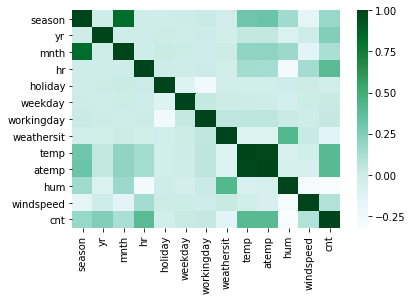

In [30]:
sns.heatmap(corr,cmap='BuGn', xticklabels=corr.columns, yticklabels=corr.columns)

We can see some very high correlation between temp and atemp. We remove atemp to avoid noise in our Linear Regression

In [31]:
hour_dd = hour_dd.drop(["atemp"], axis=1)

In [32]:
hour_dd.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1
